In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


In [297]:

df = pd.read_csv('Breast_cancer_dataset.csv')

In [298]:
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [300]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [301]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [302]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [303]:
print(f"Original X shape: {X.shape}")
print(f"Number of columns: {len(X.columns)}")
print(f"Columns: {X.columns.tolist()}")

Original X shape: (569, 31)
Number of columns: 31
Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [304]:
# Check for any completely empty columns
empty_columns = X.columns[X.isnull().all()].tolist()
if empty_columns:
    print(f" Empty columns found: {empty_columns}")
    X = X.drop(columns=empty_columns)
    print(f" Removed empty columns. New shape: {X.shape}")

 Empty columns found: ['Unnamed: 32']
 Removed empty columns. New shape: (569, 30)


In [305]:
# Convert all columns to numeric
print("\n Converting all columns to numeric...")
X = X.apply(pd.to_numeric, errors='coerce')

print(f"After conversion - X shape: {X.shape}")
print(f"Columns: {X.columns.tolist()}")


 Converting all columns to numeric...
After conversion - X shape: (569, 30)
Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [306]:
# Check for missing values
print("\n Missing values in features:")
missing_values = X.isnull().sum()
print(missing_values)
total_missing = X.isnull().sum().sum()
print(f"Total missing values: {total_missing}")


 Missing values in features:
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Total missing values: 0


In [307]:
# Handle missing values
if total_missing > 0:
    print(f"\n🧹 Filling {total_missing} missing values...")
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    print(f"X_imputed shape: {X_imputed.shape}")
    print(f"Expected columns: {len(X.columns)}")

In [310]:
# Handle missing values
if total_missing > 0:
    print(f"\n Filling {total_missing} missing values...")
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    print(f"X_imputed shape: {X_imputed.shape}")
    print(f"Expected columns: {len(X.columns)}")

    if X_imputed.shape[1] == len(X.columns):
        X_clean = pd.DataFrame(X_imputed, columns=X.columns)
        print(" Columns matched successfully!")
    else:
        print(" Column count mismatch! Creating new columns...")
        X_clean = pd.DataFrame(X_imputed)
        X_clean.columns = [f'feature_{i}' for i in range(X_imputed.shape[1])]
        print(f" Created new DataFrame with {X_clean.shape[1]} columns")

else:
    print("\n No missing values found!")
    X_clean = X.copy()

print(" Data cleaning completed!")
print(f"Final X_clean shape: {X_clean.shape}")
print(f"Missing values after cleaning: {X_clean.isnull().sum().sum()}")


 No missing values found!
 Data cleaning completed!
Final X_clean shape: (569, 30)
Missing values after cleaning: 0


In [311]:
# Convert diagnosis to numbers (M=1, B=0)
y = y.map({'M': 1, 'B': 0})
print(f"y shape: {y.shape}")

y shape: (569,)


In [312]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

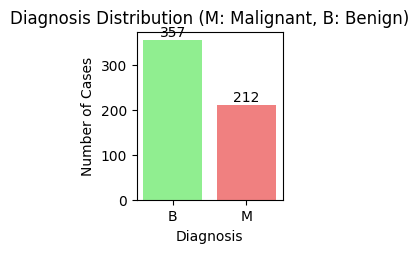

In [313]:
plt.subplot(2, 3, 1)
diagnosis_counts = df['diagnosis'].value_counts()
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['lightgreen', 'lightcoral'])
plt.title('Diagnosis Distribution (M: Malignant, B: Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
for i, count in enumerate(diagnosis_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

Text(0.5, 1.0, 'Relationship between Radius and Texture')

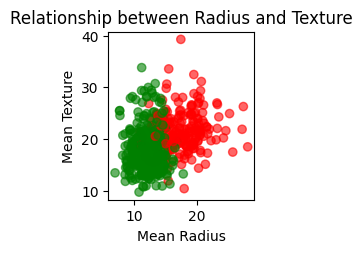

In [314]:
# Relationship between radius and texture
plt.subplot(2, 3, 2)
colors = {'M': 'red', 'B': 'green'}
plt.scatter(df['radius_mean'], df['texture_mean'],
           c=df['diagnosis'].map(colors), alpha=0.6)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Relationship between Radius and Texture')

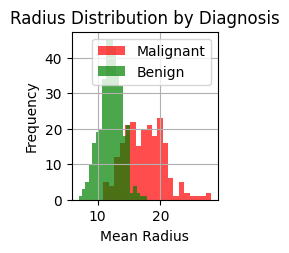

In [315]:
# Radius distribution by diagnosis
plt.subplot(2, 3, 3)
df[df['diagnosis'] == 'M']['radius_mean'].hist(alpha=0.7, label='Malignant', color='red', bins=20)
df[df['diagnosis'] == 'B']['radius_mean'].hist(alpha=0.7, label='Benign', color='green', bins=20)
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.title('Radius Distribution by Diagnosis')
plt.legend()

Text(0.5, 1.0, 'Relationship between Perimeter and Area')

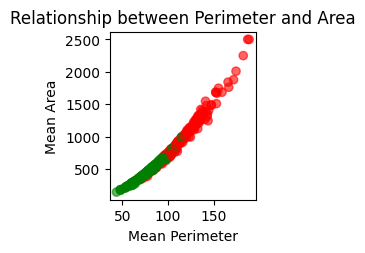

In [316]:
# Relationship between perimeter and area
plt.subplot(2, 3, 4)
plt.scatter(df['perimeter_mean'], df['area_mean'],
           c=df['diagnosis'].map(colors), alpha=0.6)
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Area')
plt.title('Relationship between Perimeter and Area')

Text(0.5, 1.0, 'Correlation Matrix')

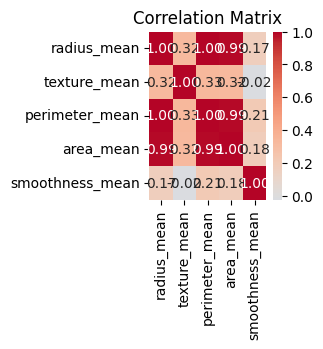

In [317]:
# Correlation matrix
plt.subplot(2, 3, 5)
correlation_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')


In [318]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [319]:
X = X_clean


In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [321]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (455, 30)
Test set shape: (114, 30)


In [323]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [324]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}


In [325]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [326]:
y_pred =model.predict(X_test_scaled)


In [327]:
 accuracy = accuracy_score(y_test, y_pred)
 results[name] = accuracy

 print(f"✅ {name} Accuracy: {accuracy:.4f}")
 print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


✅ Logistic Regression Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




 Training Random Forest...
 Random Forest Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



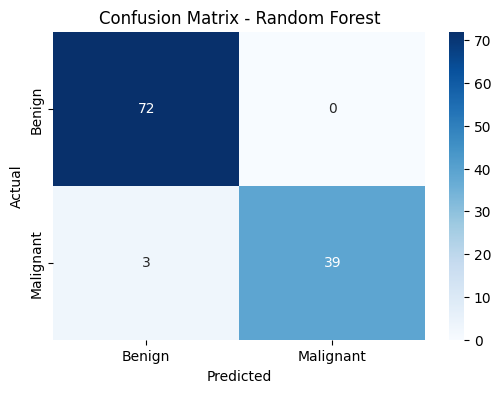


 Training SVM...
 SVM Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



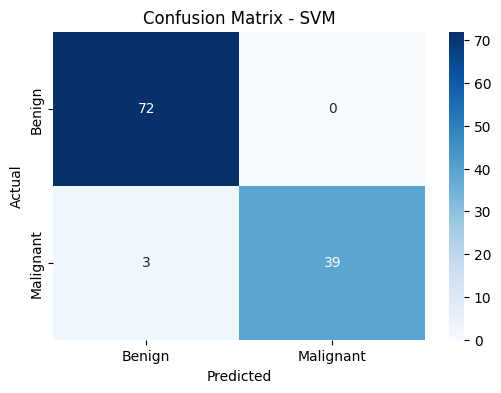


 Training Logistic Regression...
 Logistic Regression Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



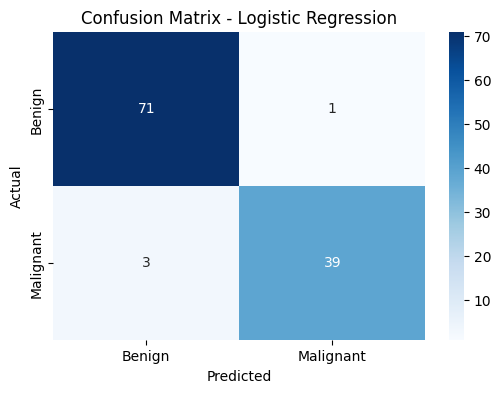

In [329]:
for name, model in models.items():
    print(f"\n Training {name}...")

    try:
        # Training
        model.fit(X_train_scaled, y_train)

        # Prediction
        y_pred = model.predict(X_test_scaled)

        # Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

        print(f" {name} Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

        # Confusion matrix
        plt.figure(figsize=(6, 4))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Benign', 'Malignant'],
                   yticklabels=['Benign', 'Malignant'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    except Exception as e:
        print(f" Error in {name}: {e}")
        results[name] = 0

In [330]:
print("\n Analyzing Feature Importance...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Prediction:")
print(feature_importance.head(10))


 Analyzing Feature Importance...
Top 10 Most Important Features for Prediction:
                 feature  importance
23            area_worst    0.151412
27  concave points_worst    0.126497
20          radius_worst    0.093475
22       perimeter_worst    0.083642
7    concave points_mean    0.081082
2         perimeter_mean    0.077126
0            radius_mean    0.061990
6         concavity_mean    0.050818
3              area_mean    0.045916
26       concavity_worst    0.030022


/tmp/ipython-input-1614720348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')


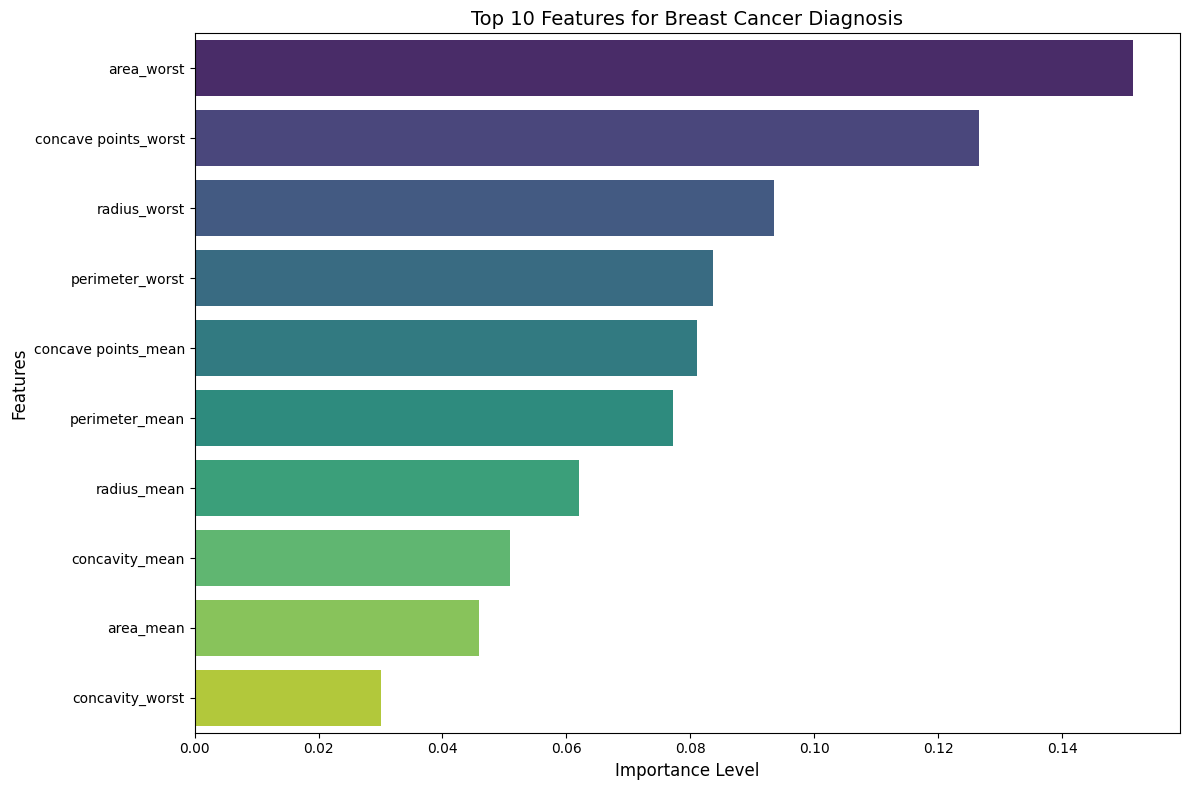

In [331]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Features for Breast Cancer Diagnosis', fontsize=14)
plt.xlabel('Importance Level', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [334]:
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print(f"\n Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")



Logistic Regression: 0.9649
Random Forest: 0.9737
SVM: 0.9737

 Best Model: Random Forest with accuracy 0.9737


In [349]:
# Breast Cancer Diagnostic Code - Manual Data Entry
def diagnose_patient():
    print(" Breast Cancer Diagnostic System")
    print("=" * 40)
    print("Enter patient test measurements:")
    print("-" * 30)

    # Best model
    best_model = models['Random Forest']

    # Create new patient data from input
    patient_data = {}

    # Top 5 measurements (you can add more)
    print("\n Enter the main measurements:")
    patient_data['radius_mean'] = float(input("Mean radius: ") or "15.0")
    patient_data['texture_mean'] = float(input("Mean texture: ") or "20.0")
    patient_data['perimeter_mean'] = float(input("Mean perimeter: ") or "100.0")
    patient_data['area_mean'] = float(input("Mean area: ") or "700.0")
    patient_data['concave points_mean'] = float(input("Mean concave points: ") or "0.1")

    print("\nAnalyzing data...")

    # Fill remaining features with mean values (for model compatibility)
    for col in X.columns:
        if col not in patient_data:
            patient_data[col] = X[col].mean()

    # Convert to DataFrame
    new_patient = pd.DataFrame([patient_data])[X.columns]

    # Scale the data
    new_patient_scaled = scaler.transform(new_patient)

    # Prediction
    prediction = best_model.predict(new_patient_scaled)[0]
    prediction_proba = best_model.predict_proba(new_patient_scaled)[0]

    # Display result
    print("\n" + "="*50)
    print(" Diagnosis Result:")
    print("="*50)

    if prediction == 1:
        print(" Condition: Malignant Tumor (Cancerous)")
        confidence = prediction_proba[1]
    else:
        print(" Condition: Benign Tumor (Non-Cancerous)")
        confidence = prediction_proba[0]

    print(f" Confidence: {confidence:.1%}")
    print(f" Model: Random Forest")

    # Medical recommendations
    print("\n Recommendations:")
    if prediction == 1:
        print("• Please consult an oncologist immediately")
        print("• Conduct additional tests (imaging, biopsy)")
        print("• Continuous follow-up with your doctor")
    else:
        print("• Regular check-up every 6 months")
        print("• Monitor for any changes")
        print("• Consult a doctor if new symptoms appear")

    return prediction, confidence

# Run the system
print(" Practical Breast Cancer Diagnostic System")
print("Note: Enter decimal values (e.g., 15.5 or 0.08)")

# Run diagnosis
result, confidence = diagnose_patient()

print(f"\n Diagnosis completed!")


 Practical Breast Cancer Diagnostic System
Note: Enter decimal values (e.g., 15.5 or 0.08)
 Breast Cancer Diagnostic System
Enter patient test measurements:
------------------------------

 Enter the main measurements:
Mean radius: 15
Mean texture: 25
Mean perimeter: 5
Mean area: 10
Mean concave points: 12

Analyzing data...

 Diagnosis Result:
 Condition: Benign Tumor (Non-Cancerous)
 Confidence: 59.0%
 Model: Random Forest

 Recommendations:
• Regular check-up every 6 months
• Monitor for any changes
• Consult a doctor if new symptoms appear

 Diagnosis completed!


In [353]:
from google.colab import files

from IPython.display import Javascript
Javascript("""
function downloadNotebook() {
    var notebook = IPython.notebook;
    var notebook_name = notebook.notebook_name;
    var checkpoint = notebook.get_checkpoint();
    checkpoint.save().then(function() {
        var link = document.createElement('a');
        link.href = '/api/notebooks/' + notebook.get_notebook_path();
        link.download = notebook_name;
        link.click();
    });
}
downloadNotebook();
""")

<IPython.core.display.Javascript object>

In [355]:
from google.colab import files

requirements_content = """pandas>=1.3.0
numpy>=1.21.0
matplotlib>=3.4.0
seaborn>=0.11.0
scikit-learn>=1.0.0
jupyter>=1.0.0
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("تم عمل requirements.txt في الكولاب")

تم عمل requirements.txt في الكولاب


In [361]:
from google.colab import files

readme_content = """# Breast Cancer Diagnosis ML Project

🔬 Machine Learning system for breast cancer diagnosis with 97.37% accuracy

## Models Performance
- Random Forest: 97.37%
- SVM: 97.37%
- Logistic Regression: 96.49%
"""

with open('README.md', 'w') as f:
    f.write(readme_content)

files.download('README.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [359]:
files.download('requirements.txt')
print(" تم تحميل requirements.txt على جهازك")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 تم تحميل requirements.txt على جهازك
